In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("FinalCleanedData.csv")

In [4]:
df.shape

(230423, 43)

In [5]:
df.describe()

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5
count,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,...,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000,230423.000000
mean,0.422210,0.386224,0.089939,0.041910,0.093402,0.107806,0.105389,0.080487,0.039302,0.143098,...,0.062602,0.755714,1.581457,1.140712,0.308895,0.619073,0.206683,0.237821,0.990586,1.961480
std,0.493913,0.486884,0.286095,0.200384,0.290996,0.310136,0.307054,0.272046,0.194312,0.350173,...,0.242247,0.429664,2.612202,1.484645,1.047712,1.203173,0.471625,0.524625,1.544723,0.192449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.430000,0.000000,0.170000,0.030000,0.070000,0.430000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.030000,0.430000,0.140000,0.140000,1.000000,2.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,2.000000,0.290000,0.830000,0.290000,0.290000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,88.000000,98.000000,90.000000,92.000000,50.000000,75.000000,90.000000,2.000000


In [6]:
all_col = ['RFHYPE5', 'RFCHOL2', 'MICHD', 'CVDSTRK3', 'CASTHM1', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD2', 'CHCKDNY2', 'DIABETE4', 'DRDXAR2', 'SEXVAR',
       'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2',
       'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3',
       'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4', 'PREGNANT', 'DEAF',
       'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ', 'FRUTDA2',
       'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2', 'HIVRISK5']

In [7]:
x_col = ['RFHYPE5', 'RFCHOL2', 'CASTHM1', 'CHCSCNCR', 'CHCOCNCR', 'DRDXAR2',
       'SEXVAR', 'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1',
       'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1',
       'VETERAN3', 'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4',
       'PREGNANT', 'DEAF', 'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ',
       'FRUTDA2', 'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2',
       'HIVRISK5']

In [8]:
target_d = ["MICHD", "CHCCOPD2", "CHCKDNY2", "CVDSTRK3", "DIABETE4"]
# heart disease - MICHD , lung disease - CHCCOPD2, kidney disease - CHCKDNY2, 
# stroke - CVDSTRK3, diabetes - DIABETE4

In [9]:
df.dtypes
#all are int64

RFHYPE5       int64
RFCHOL2       int64
MICHD         int64
CVDSTRK3      int64
CASTHM1       int64
CHCSCNCR      int64
CHCOCNCR      int64
CHCCOPD2      int64
CHCKDNY2      int64
DIABETE4      int64
DRDXAR2       int64
SEXVAR        int64
GENHLTH       int64
PHYS14D       int64
MENT14D       int64
POORHLTH      int64
HLTHPLN1      int64
PERSDOC2      int64
MEDCOST       int64
CHECKUP1      int64
MARITAL       int64
EDUCA         int64
RENTHOM1      int64
VETERAN3      int64
EMPLOY1       int64
CHLDCNT       int64
INCOME2       int64
WTKG3         int64
HTM4          int64
PREGNANT      int64
DEAF          int64
BLIND         int64
RFSMOK3       int64
RFDRHV7       int64
TOTINDA       int64
STRFREQ     float64
FRUTDA2     float64
FTJUDA2     float64
GRENDA1     float64
FRNCHDA     float64
POTADA1     float64
VEGEDA2     float64
HIVRISK5      int64
dtype: object

In [10]:
df[df.isna().any(axis=1)]
# all no NA values

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5


In [11]:
df[df.isnull().any(axis=1)]
# no null values

,RFHYPE5,RFCHOL2,MICHD,CVDSTRK3,CASTHM1,CHCSCNCR,CHCOCNCR,CHCCOPD2,CHCKDNY2,DIABETE4,...,RFDRHV7,TOTINDA,STRFREQ,FRUTDA2,FTJUDA2,GRENDA1,FRNCHDA,POTADA1,VEGEDA2,HIVRISK5


In [12]:
# for i in range(43):
#     df[f'{all_col[i]}'] = df[f'{all_col[i]}'].astype('category')
# df.dtypes

In [13]:
X = df.drop(target_d, axis=1)
y = df[target_d]

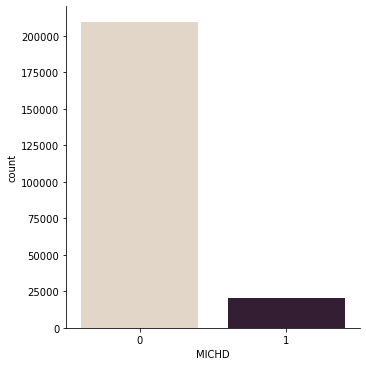

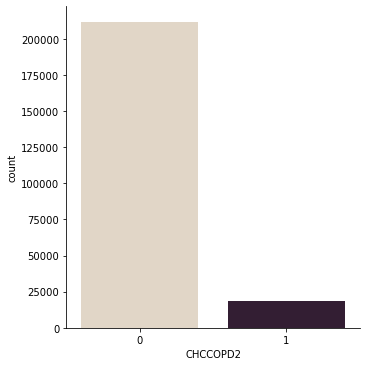

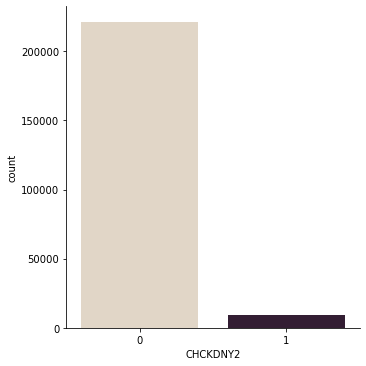

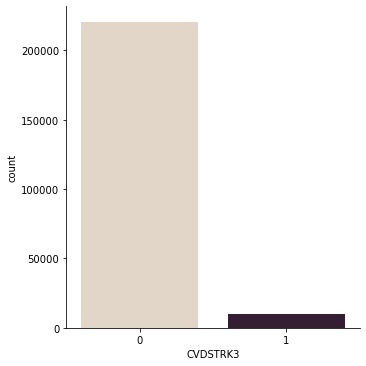

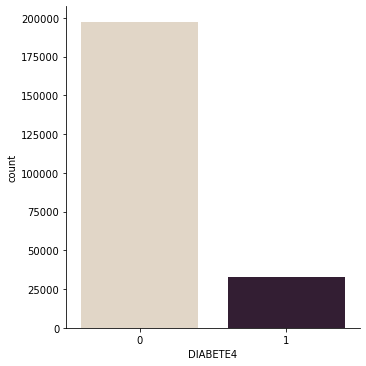

In [14]:
for x in range(len(target_d)):
    sns.catplot(x= df[target_d[x]], kind="count", palette="ch:.25", data=df)
    
#from simple countplots, we can see that there are imbalances in the dataset

In [15]:
# exact extent of imbalance
for i in range(len(target_d)):
    print(round(df[f'{target_d[i]}'].value_counts() / len(df), 2)) 
# very imbalanced, mostly in the 90/10 range.

0    0.91
1    0.09
Name: MICHD, dtype: float64
0    0.92
1    0.08
Name: CHCCOPD2, dtype: float64
0    0.96
1    0.04
Name: CHCKDNY2, dtype: float64
0    0.96
1    0.04
Name: CVDSTRK3, dtype: float64
0    0.86
1    0.14
Name: DIABETE4, dtype: float64


# Data Exp

# SMOTE 

In [16]:
from sklearn.model_selection import train_test_split
# creating a set of un-smoted test data for later testing

In [17]:
X0_train, X0_test, y0_train, y0_test = \
train_test_split(X,df[target_d[0]],test_size=0.3,random_state=42)

In [18]:
X1_train, X1_test, y1_train, y1_test = \
train_test_split(X,df[target_d[1]],test_size=0.3,random_state=42)

In [19]:
X2_train, X2_test, y2_train, y2_test = \
train_test_split(X,df[target_d[2]],test_size=0.3,random_state=42)

In [20]:
X3_train, X3_test, y3_train, y3_test = \
train_test_split(X,df[target_d[3]],test_size=0.3,random_state=42)

In [21]:
X4_train, X4_test, y4_train, y4_test = \
train_test_split(X,df[target_d[4]],test_size=0.3,random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# possible issue, the rows can have more than 1 disease so.... still smote?

In [23]:
# for i in range(5):
#     Xi, y_i = oversample.fit_resample(X, df[target_d[i]])

In [24]:
X0_os, y0_os = oversample.fit_resample(X0_train, y0_train)
# print(round(X1[f'{target_d[1]}'].value_counts() / len(X1), 2))

In [25]:
from collections import Counter
print("MICHD")
print("Before SMOTE :", Counter(y0_train))
print("After SMOTE :", Counter(y0_os))

MICHD
Before SMOTE : Counter({0: 146840, 1: 14456})
After SMOTE : Counter({0: 146840, 1: 146840})


In [26]:
X1_os, y1_os = oversample.fit_resample(X1_train, y1_train)
X2_os, y2_os = oversample.fit_resample(X2_train, y2_train)
X3_os, y3_os = oversample.fit_resample(X3_train, y3_train)
X4_os, y4_os = oversample.fit_resample(X4_train, y4_train)
# SMOTE all

In [27]:
print("CHCCOPD2")
print("Before SMOTE :", Counter(y1_train))
print("After SMOTE :", Counter(y1_os))
print("CHCKDNY2")
print("Before SMOTE :", Counter(y2_train))
print("After SMOTE :", Counter(y2_os))
print("CVDSTRK3")
print("Before SMOTE :", Counter(y3_train))
print("After SMOTE :", Counter(y3_os))
print("DIABETE4")
print("Before SMOTE :", Counter(y4_train))
print("After SMOTE :", Counter(y4_os))

CHCCOPD2
Before SMOTE : Counter({0: 148406, 1: 12890})
After SMOTE : Counter({0: 148406, 1: 148406})
CHCKDNY2
Before SMOTE : Counter({0: 154913, 1: 6383})
After SMOTE : Counter({0: 154913, 1: 154913})
CVDSTRK3
Before SMOTE : Counter({0: 154549, 1: 6747})
After SMOTE : Counter({0: 154549, 1: 154549})
DIABETE4
Before SMOTE : Counter({0: 138138, 1: 23158})
After SMOTE : Counter({0: 138138, 1: 138138})


In [28]:
# future for loops
x_train_list_os = ["X0_os","X1_os","X2_os","X3_os","X4_os"]
x_test_list = ["X0_test","X1_test","X2_test","X3_test","X4_test"]
y_train_list_os = ["y0_os","y1_os","y2_os","y3_os","y4_os"]
y_test_list = ["y0_test","y1_test","y2_test","y3_test","y4_test"]

## Start of NN

In [29]:
# Source: https://www.youtube.com/watch?v=aBIGJeHRZLQ
X0_os.shape
# for input shape

(293680, 38)

In [30]:
# X0_stack = np.column_stack(X0_os['RFHYPE5'], X0_os['RFCHOL2'], X0_os['CASTHM1'], X0_os['CHCSCNCR'], X0_os['CHCOCNCR'], X0_os['DRDXAR2'], X0_os['SEXVAR'], X0_os['GENHLTH'], X0_os['PHYS14D'], X0_os['MENT14D'], X0_os['POORHLTH'], X0_os['HLTHPLN1'], X0_os['PERSDOC2'], X0_os['MEDCOST'], X0_os['CHECKUP1'], X0_os['MARITAL'], X0_os['EDUCA'], X0_os['RENTHOM1'], X0_os['VETERAN3'], X0_os['EMPLOY1'], X0_os['CHLDCNT'], X0_os['INCOME2'], X0_os['WTKG3'], X0_os['HTM4'], X0_os['PREGNANT'], X0_os['DEAF'], X0_os['BLIND'], X0_os['RFSMOK3'], X0_os['RFDRHV7'], X0_os['TOTINDA'], X0_os['STRFREQ'], X0_os['FRUTDA2'], X0_os['FTJUDA2'], X0_os['GRENDA1'], X0_os['FRNCHDA'], X0_os['POTADA1'], X0_os['VEGEDA2'], X0_os['HIVRISK5'])

In [31]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(38,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')])

#final layer = 2 because for each NN we are making, its for 1 disease thus its either Yes/No.

In [32]:
model.compile(optimizer='adam', 
	          loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	          metrics=['accuracy'])

In [33]:
# x = np.column_stack((train_df.x.values, train_df.y.values))

In [34]:
# https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
# Fit for MICHD
model.fit(X0_os.values, y0_os.values, batch_size=16, epochs=10)

Epoch 1/10
18355/18355 [==============================] - 18s 955us/step - loss: 7.1070 - accuracy: 0.6027
Epoch 2/10
18355/18355 [==============================] - 17s 942us/step - loss: 0.6417 - accuracy: 0.7223
Epoch 3/10
18355/18355 [==============================] - 18s 964us/step - loss: 0.4816 - accuracy: 0.7706
Epoch 4/10
18355/18355 [==============================] - 18s 954us/step - loss: 0.4645 - accuracy: 0.7818
Epoch 5/10
18355/18355 [==============================] - 17s 948us/step - loss: 0.4609 - accuracy: 0.7845
Epoch 6/10
18355/18355 [==============================] - 17s 940us/step - loss: 0.4571 - accuracy: 0.7867
Epoch 7/10
18355/18355 [==============================] - 17s 940us/step - loss: 0.4532 - accuracy: 0.7886
Epoch 8/10
18355/18355 [==============================] - 17s 943us/step - loss: 0.4485 - accuracy: 0.7916
Epoch 9/10
18355/18355 [==============================] - 17s 940us/step - loss: 0.4479 - accuracy: 0.7917
Epoch 10/10
18355/18355 [============

In [35]:
print("EVALUATION")
model.evaluate(X0_test.values, y0_test.values)

EVALUATION
2161/2161 [==============================] - 2s 763us/step - loss: 0.4283 - accuracy: 0.8021


[0.4282779395580292, 0.8020744323730469]

In [36]:
# Fit for CHCCOPD2
model.fit(X1_os.values, y1_os.values, batch_size=16, epochs=10)

Epoch 1/10
18551/18551 [==============================] - 27s 1ms/step - loss: 0.4695 - accuracy: 0.7804
Epoch 2/10
18551/18551 [==============================] - 25s 1ms/step - loss: 0.4457 - accuracy: 0.7957
Epoch 3/10
18551/18551 [==============================] - 25s 1ms/step - loss: 0.4395 - accuracy: 0.7994
Epoch 4/10
18551/18551 [==============================] - 25s 1ms/step - loss: 0.4349 - accuracy: 0.8018
Epoch 5/10
18551/18551 [==============================] - 25s 1ms/step - loss: 0.4335 - accuracy: 0.8029
Epoch 6/10
18551/18551 [==============================] - 26s 1ms/step - loss: 0.4329 - accuracy: 0.8031
Epoch 7/10
18551/18551 [==============================] - 25s 1ms/step - loss: 0.4324 - accuracy: 0.8033
Epoch 8/10
18551/18551 [==============================] - 25s 1ms/step - loss: 0.4310 - accuracy: 0.8034
Epoch 9/10
18551/18551 [==============================] - 25s 1ms/step - loss: 0.4306 - accuracy: 0.8041
Epoch 10/10
18551/18551 [==============================

In [37]:
print("EVALUATION")
model.evaluate(X1_test.values, y1_test.values)

EVALUATION
2161/2161 [==============================] - 2s 782us/step - loss: 0.4457 - accuracy: 0.7932


[0.44569846987724304, 0.7932211756706238]

In [38]:
# Fit for CHCKDNY2
model.fit(X2_os.values, y2_os.values, batch_size=16, epochs=10)

Epoch 1/10
19365/19365 [==============================] - 26s 1ms/step - loss: 0.4649 - accuracy: 0.7827
Epoch 2/10
19365/19365 [==============================] - 26s 1ms/step - loss: 0.4446 - accuracy: 0.7948
Epoch 3/10
19365/19365 [==============================] - 26s 1ms/step - loss: 0.4350 - accuracy: 0.8005
Epoch 4/10
19365/19365 [==============================] - 27s 1ms/step - loss: 0.4314 - accuracy: 0.8028
Epoch 5/10
19365/19365 [==============================] - 26s 1ms/step - loss: 0.4291 - accuracy: 0.8041
Epoch 6/10
19365/19365 [==============================] - 27s 1ms/step - loss: 0.4276 - accuracy: 0.8046
Epoch 7/10
19365/19365 [==============================] - 27s 1ms/step - loss: 0.4267 - accuracy: 0.8052 0s - loss: 0.4
Epoch 8/10
19365/19365 [==============================] - 26s 1ms/step - loss: 0.4248 - accuracy: 0.8065
Epoch 9/10
19365/19365 [==============================] - 26s 1ms/step - loss: 0.4250 - accuracy: 0.8067
Epoch 10/10
19365/19365 [===============

In [44]:
print("EVALUATION")
model.evaluate(X2_test.values, y2_test.values)

EVALUATION
2161/2161 [==============================] - 2s 789us/step - loss: 0.5482 - accuracy: 0.7199


[0.5482375025749207, 0.7199212908744812]

In [39]:
# Fit for CVDSTRK3
model.fit(X3_os.values, y3_os.values, batch_size=16, epochs=10)

Epoch 1/10
19319/19319 [==============================] - 26s 1ms/step - loss: 0.4170 - accuracy: 0.8115
Epoch 2/10
19319/19319 [==============================] - 26s 1ms/step - loss: 0.4119 - accuracy: 0.8144
Epoch 3/10
19319/19319 [==============================] - 26s 1ms/step - loss: 0.4097 - accuracy: 0.8163
Epoch 4/10
19319/19319 [==============================] - 26s 1ms/step - loss: 0.4096 - accuracy: 0.8159
Epoch 5/10
19319/19319 [==============================] - 26s 1ms/step - loss: 0.4086 - accuracy: 0.8171
Epoch 6/10
19319/19319 [==============================] - 26s 1ms/step - loss: 0.4086 - accuracy: 0.8166
Epoch 7/10
19319/19319 [==============================] - 26s 1ms/step - loss: 0.4078 - accuracy: 0.8174
Epoch 8/10
19319/19319 [==============================] - 28s 1ms/step - loss: 0.4082 - accuracy: 0.8169
Epoch 9/10
19319/19319 [==============================] - 32s 2ms/step - loss: 0.4074 - accuracy: 0.8170
Epoch 10/10
19319/19319 [==============================

In [40]:
print("EVALUATION")
model.evaluate(X3_test.values, y3_test.values)

EVALUATION
2161/2161 [==============================] - 2s 1ms/step - loss: 0.5278 - accuracy: 0.7352


[0.5277618765830994, 0.7351685762405396]

In [41]:
# Fit for DIABETE4
model.fit(X4_os.values, y4_os.values, batch_size=16, epochs=10)

Epoch 1/10
17268/17268 [==============================] - 31s 2ms/step - loss: 0.4520 - accuracy: 0.7932
Epoch 2/10
17268/17268 [==============================] - 29s 2ms/step - loss: 0.4444 - accuracy: 0.7966
Epoch 3/10
17268/17268 [==============================] - 24s 1ms/step - loss: 0.4410 - accuracy: 0.7980
Epoch 4/10
17268/17268 [==============================] - 23s 1ms/step - loss: 0.4392 - accuracy: 0.7994
Epoch 5/10
17268/17268 [==============================] - 22s 1ms/step - loss: 0.4387 - accuracy: 0.7991
Epoch 6/10
17268/17268 [==============================] - 22s 1ms/step - loss: 0.4379 - accuracy: 0.7996
Epoch 7/10
17268/17268 [==============================] - 22s 1ms/step - loss: 0.4372 - accuracy: 0.8008
Epoch 8/10
17268/17268 [==============================] - 22s 1ms/step - loss: 0.4370 - accuracy: 0.7997
Epoch 9/10
17268/17268 [==============================] - 22s 1ms/step - loss: 0.4365 - accuracy: 0.8006
Epoch 10/10
17268/17268 [==============================

In [42]:
print("EVALUATION")
model.evaluate(X4_test.values, y4_test.values)

EVALUATION
2161/2161 [==============================] - 2s 809us/step - loss: 0.5230 - accuracy: 0.7376


[0.5229687094688416, 0.7375699877738953]

In [51]:
print("Prediction", np.round(model.predict(np.array(X.iloc[1,:].values))))
# print("Prediction", np.round(model.predict(np.array([[0,3]]))))

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 38 but received input with shape (None, 1)


In [52]:
X.iloc[1,:].shape

(38,)

# LIME

In [ ]:
from lime import lime_tabular

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data = ,
    mode = "classification",
    feature_names = x,
    categorical_features = y )

In [ ]:
exp = explain_instance(data_row = X_test.iloc[4],
                      predict_fn = model.predict)
exp.show_in_notebook(show_table = True)